<a href="https://colab.research.google.com/github/db-telkomsby/bigdataanalytic/blob/main/Sentiment_Analysis_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Import Library**

* VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
Source : https://github.com/cjhutto/vaderSentiment




In [ ]:
# Install Library
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


* Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
* NLTK is a leading platform for building Python programs to work with human language data.

In [ ]:
# Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

##**2. Import Data**

In [ ]:
# Import Data from Github
url = 'https://raw.githubusercontent.com/mrbarokah/Python/master/dataset/Text_GeneralMotor.csv'
df = pd.read_csv(url, sep=',',)

In [ ]:
# Import Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("DIGBIS02.csv")

In [ ]:
# Import Data if Normal
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text_GeneralMotor.csv")

In [ ]:
# Import Normal Data if UnicodeError Occured
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Text_GeneralMotor.csv", encoding = "ISO-8859-1")

In [ ]:
df.head(5)

,userName,score,at,content
0,Jacquelyn De Longe,4,2023-11-27 01:38:20,Netflix is an amazing app to watch your TV sho...
1,Randy Jose Del Rosario,5,2023-11-27 01:32:12,Usefull
2,Josh Mcury,1,2023-11-27 01:29:31,Worthless app/company. Once they paved the way...
3,Mohammed Abdel-Mawgoud,5,2023-11-27 01:22:15,Xdgfcdfff. مرحبا مرحبا دولار أمريكي مرحبا مليو...
4,Sharon A Hinrickson,3,2023-11-27 01:03:02,I have had this app for years and before year ...


In [ ]:
df.shape

(200, 4)

#**3. PreProcessing**

###a. Remove Duplicate

In [ ]:
# Remove Duplicate Row from Table
df = df.drop_duplicates()
df.shape

(200, 4)

###b. RemoveURL

In [ ]:
# Remove Duplicate from Selected Column
df['content'] = df['content'].str.replace('http\S+|www.\S+', '', case=False)

<ipython-input-8-45e073f3f1e5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('http\S+|www.\S+', '', case=False)


In [ ]:
df

,userName,score,at,content
0,Jacquelyn De Longe,4,2023-11-27 01:38:20,Netflix is an amazing app to watch your TV sho...
1,Randy Jose Del Rosario,5,2023-11-27 01:32:12,Usefull
2,Josh Mcury,1,2023-11-27 01:29:31,Worthless app/company. Once they paved the way...
3,Mohammed Abdel-Mawgoud,5,2023-11-27 01:22:15,Xdgfcdfff. مرحبا مرحبا دولار أمريكي مرحبا مليو...
4,Sharon A Hinrickson,3,2023-11-27 01:03:02,I have had this app for years and before year ...
...,...,...,...,...
195,Vanessa,5,2023-11-25 21:11:33,Love it
196,Felony Mind dutty,4,2023-11-25 21:07:17,Gazbet Official on web
197,Caitlin Lee,2,2023-11-25 20:57:23,I have the idea for coming Winx Club Saga seas...
198,Tabitha Lawson,5,2023-11-25 20:53:49,Good


###c. LowerCasing

In [ ]:
# Merubah keseluruhan kalimat di kolom yang dipilih menjadi huruf kecil
df['content'] = df['content'].str.lower()

In [ ]:
df

,userName,score,at,content
0,Jacquelyn De Longe,4,2023-11-27 01:38:20,netflix is an amazing app to watch your tv sho...
1,Randy Jose Del Rosario,5,2023-11-27 01:32:12,usefull
2,Josh Mcury,1,2023-11-27 01:29:31,worthless app/company. once they paved the way...
3,Mohammed Abdel-Mawgoud,5,2023-11-27 01:22:15,xdgfcdfff. مرحبا مرحبا دولار أمريكي مرحبا مليو...
4,Sharon A Hinrickson,3,2023-11-27 01:03:02,i have had this app for years and before year ...
...,...,...,...,...
195,Vanessa,5,2023-11-25 21:11:33,love it
196,Felony Mind dutty,4,2023-11-25 21:07:17,gazbet official on web
197,Caitlin Lee,2,2023-11-25 20:57:23,i have the idea for coming winx club saga seas...
198,Tabitha Lawson,5,2023-11-25 20:53:49,good


In [ ]:
df.content

0      netflix is an amazing app to watch your tv sho...
1                                                usefull
2      worthless app/company. once they paved the way...
3      xdgfcdfff. مرحبا مرحبا دولار أمريكي مرحبا مليو...
4      i have had this app for years and before year ...
                             ...                        
195                                              love it
196                               gazbet official on web
197    i have the idea for coming winx club saga seas...
198                                                 good
199                                              perfect
Name: content, Length: 200, dtype: object

###d. RemoveUsername (Optional)

In [ ]:
# Menghilangkan kata yang diawali oleh simbol @ pada kolom tertentu
df['content'] = df['content'].str.replace('@[^\s]+','', case=False)

<ipython-input-15-bad34cd15b22>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('@[^\s]+','', case=False)


###e. Tokenize (Optional)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Testing
example_text = df.iloc[0]
print(nltk.word_tokenize(example_text['content']))

['netflix', 'is', 'an', 'amazing', 'app', 'to', 'watch', 'your', 'tv', 'shows', 'or', 'movies', '!', 'it', 'has', 'great', 'quality', 'and', 'zero', 'ads', '!', 'this', 'app', 'is', 'for', 'kids', 'and', 'adults', 'and', 'you', 'can', 'add', 'multiple', 'accounts', 'for', 'your', 'family', 'members', '.']


In [ ]:
def identify_tokens(row):
    text = row['content']
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['content'] = df.apply(identify_tokens, axis=1)

In [ ]:
df.content

0      [netflix, is, an, amazing, app, to, watch, you...
1                                              [usefull]
2      [worthless, once, they, paved, the, way, not, ...
3      [xdgfcdfff, مرحبا, مرحبا, دولار, أمريكي, مرحبا...
4      [i, have, had, this, app, for, years, and, bef...
                             ...                        
195                                           [love, it]
196                          [gazbet, official, on, web]
197    [i, have, the, idea, for, coming, winx, club, ...
198                                               [good]
199                                            [perfect]
Name: content, Length: 200, dtype: object

###f. Stemming (Optional)

In [ ]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [ ]:
my_list = ['frightening', 'frightened', 'frightens']
print ([stemming.stem(word) for word in my_list])

['frighten', 'frighten', 'frighten']


In [ ]:
def stem_list(row):
    my_list = row['content']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stem_list, axis=1)

In [ ]:
df.content

0      [netflix, is, an, amazing, app, to, watch, you...
1                                              [usefull]
2      [worthless, once, they, paved, the, way, not, ...
3      [xdgfcdfff, مرحبا, مرحبا, دولار, أمريكي, مرحبا...
4      [i, have, had, this, app, for, years, and, bef...
                             ...                        
195                                           [love, it]
196                          [gazbet, official, on, web]
197    [i, have, the, idea, for, coming, winx, club, ...
198                                               [good]
199                                            [perfect]
Name: content, Length: 200, dtype: object

###g. Stopwords (Optional)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stops(row):
    text = row['content']
    meaningful_words = [w for w in text if not w in stops]
    return (meaningful_words)

df['content'] = df.apply(remove_stops, axis=1)

In [ ]:
#Joining Text
df['content'] = df['content'].str.join(" ")

In [ ]:
print(df['content'][0])

netflix amazing app watch tv shows movies great quality zero ads app kids adults add multiple accounts family members


###h. Special Character (Optional)

In [ ]:
import string

printable = set(string.printable)

def remove_spec_chars(in_str):
    return ''.join([c for c in in_str if c in printable])

df['content'].apply(remove_spec_chars)

0      netflix amazing app watch tv shows movies grea...
1                                                usefull
2      worthless paved way overpriced waste money com...
3                                       xdgfcdfff       
4      app years year increase another increase doesn...
                             ...                        
195                                                 love
196                                  gazbet official web
197    idea coming winx club saga season please winx ...
198                                                 good
199                                              perfect
Name: content, Length: 200, dtype: object

#**4. Sentiment Analysis**

In [ ]:
#Change Title to String
df['content'] = df['content'].astype(str)

In [ ]:
# Import library for Text Analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = []
for index, row in df.iterrows():
  df['content']
  ss = sid.polarity_scores(row['content'])
  listy.append(ss)

se = pd.Series(listy)
df['polarity'] = se.values
display(df.head(10))

,userName,score,at,content,stemmed_words,polarity
0,Jacquelyn De Longe,4,2023-11-27 01:38:20,netflix amazing app watch tv shows movies grea...,"[netflix, is, an, amaz, app, to, watch, your, ...","{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp..."
1,Randy Jose Del Rosario,5,2023-11-27 01:32:12,usefull,[useful],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Josh Mcury,1,2023-11-27 01:29:31,worthless paved way overpriced waste money com...,"[worthless, onc, they, pave, the, way, not, th...","{'neg': 0.309, 'neu': 0.691, 'pos': 0.0, 'comp..."
3,Mohammed Abdel-Mawgoud,5,2023-11-27 01:22:15,xdgfcdfff مرحبا مرحبا دولار أمريكي مرحبا مليون...,"[xdgfcdfff, مرحبا, مرحبا, دولار, أمريكي, مرحبا...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Sharon A Hinrickson,3,2023-11-27 01:03:02,app years year increase another increase doesn...,"[i, have, had, thi, app, for, year, and, befor...","{'neg': 0.073, 'neu': 0.588, 'pos': 0.339, 'co..."
5,Xato,1,2023-11-27 00:32:18,en,[en],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,Htet Aung Kyaw,5,2023-11-27 00:25:25,aung kyaw,"[aung, kyaw]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,Jennifer Smith,2,2023-11-27 00:24:40,someone netflix long price increases ridiculou...,"[for, someon, who, ha, had, netflix, for, so, ...","{'neg': 0.218, 'neu': 0.616, 'pos': 0.165, 'co..."
8,Camryn Bennett,5,2023-11-27 00:00:13,best show onit,"[best, show, onit]","{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."
9,Corie Baker,5,2023-11-26 23:59:33,reason like app r shows u cant find netflix li...,"[so, the, reason, whi, i, like, thi, app, is, ...","{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."


###a. Visualization

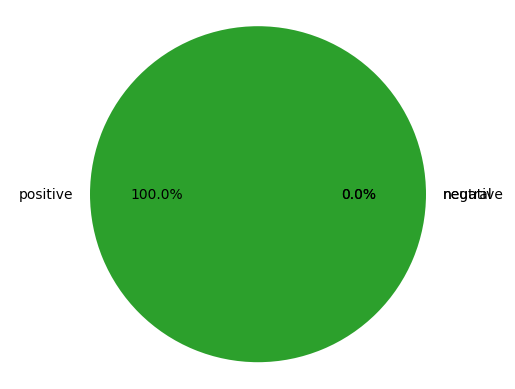

In [ ]:
# Pie Chart
import matplotlib.pyplot as plt
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

###b. Save to CSV

In [ ]:
df.to_csv('Output_File.csv', index=False)